In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [105]:
data = np.load('../raw_data/baseline.npz', allow_pickle=True)

In [106]:
# data = np.load('../raw_data/data.npz', allow_pickle=True)

In [107]:
# Display the contents of the .npz file
data.files

['datetime', 'GHI', 'CLS', 'SZA', 'SAA']

In [108]:
# Display the contents of the datetime feature
datetime= data['datetime']
datetime

array([datetime.datetime(2012, 1, 1, 9, 15),
       datetime.datetime(2012, 1, 1, 11, 15),
       datetime.datetime(2012, 1, 1, 13, 15), ...,
       datetime.datetime(2012, 12, 31, 11, 15),
       datetime.datetime(2012, 12, 31, 13, 15),
       datetime.datetime(2012, 12, 31, 15, 15)], dtype=object)

In [109]:
type(datetime)

numpy.ndarray

In [110]:
datetime.shape

(1845,)

In [111]:
GHI=data['GHI']
CLS=data['CLS']
SAA=data['SAA']
SZA=data['SZA']

In [112]:
type(GHI)

numpy.ndarray

In [113]:
GHI.shape

(1845, 4, 81, 81)

In [114]:
# Looking for the smallest value in pixel frames
a=[]
for x in GHI[99,0,:,:]:
    a.append(np.min(x))
vmin=np.min(a)
vmin

138.03

In [115]:
# Looking for the largest value in pixel frames
b=[]
for x in GHI[99,0,:,:]:
    b.append(np.max(x))
vmax=np.max(b)  
vmax

536.55

In [116]:
# Printing the smallest and largest values of the (81 x 81) pixel frames for 25th Jan at 3 pm
print(datetime[99])
print(GHI[100,3,:,:].shape)
print (vmin)
print (vmax)

2012-01-25 15:00:00
(81, 81)
138.03
536.55


In [132]:
tot=0
stat=[]
for x in range(X.shape[0]):
    for y in range(X.shape[1]):
        for z in range(X.shape[2]):
            for t in range (X.shape[3]):
                stat.append(X[x,y,z,t])
                if type(X[x,y,z,t]) != np.float64:
                    tot+=1
tot

In [72]:
df_GHI=pd.DataFrame(stat, columns=['GHI'])

In [73]:
df_GHI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48420180 entries, 0 to 48420179
Data columns (total 1 columns):
 #   Column  Dtype  
---  ------  -----  
 0   GHI     float64
dtypes: float64(1)
memory usage: 369.4 MB


In [74]:
df_GHI.describe()

,GHI
count,4.842018e+07
mean,4.949039e+02
std,2.737931e+02
min,8.040000e+00
25%,2.507800e+02
50%,4.926200e+02
75%,7.184500e+02
max,1.101740e+03


In [117]:
observation = 99
time_of_observation = 0 # 0 is t-45, 1 is t-30, 2 is t-15 and 3 is t-0
pixel_frame_x = 0 # 
pixel_frame_y = 0

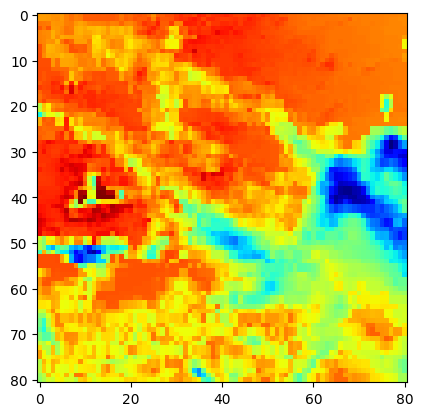

In [118]:
plt.imshow(
    GHI[
        observation, 
        time_of_observation,
        :,
        :], 
    cmap='jet', 
    norm='linear', 
    vmin=vmin, 
    vmax=vmax)

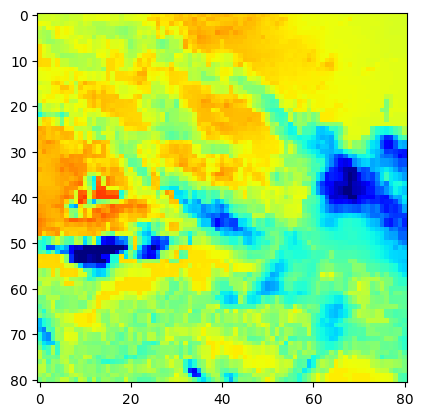

In [119]:
plt.imshow(GHI[99,2,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

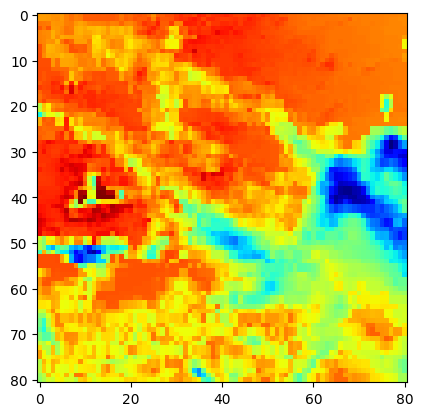

In [120]:
plt.imshow(GHI[99,0,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

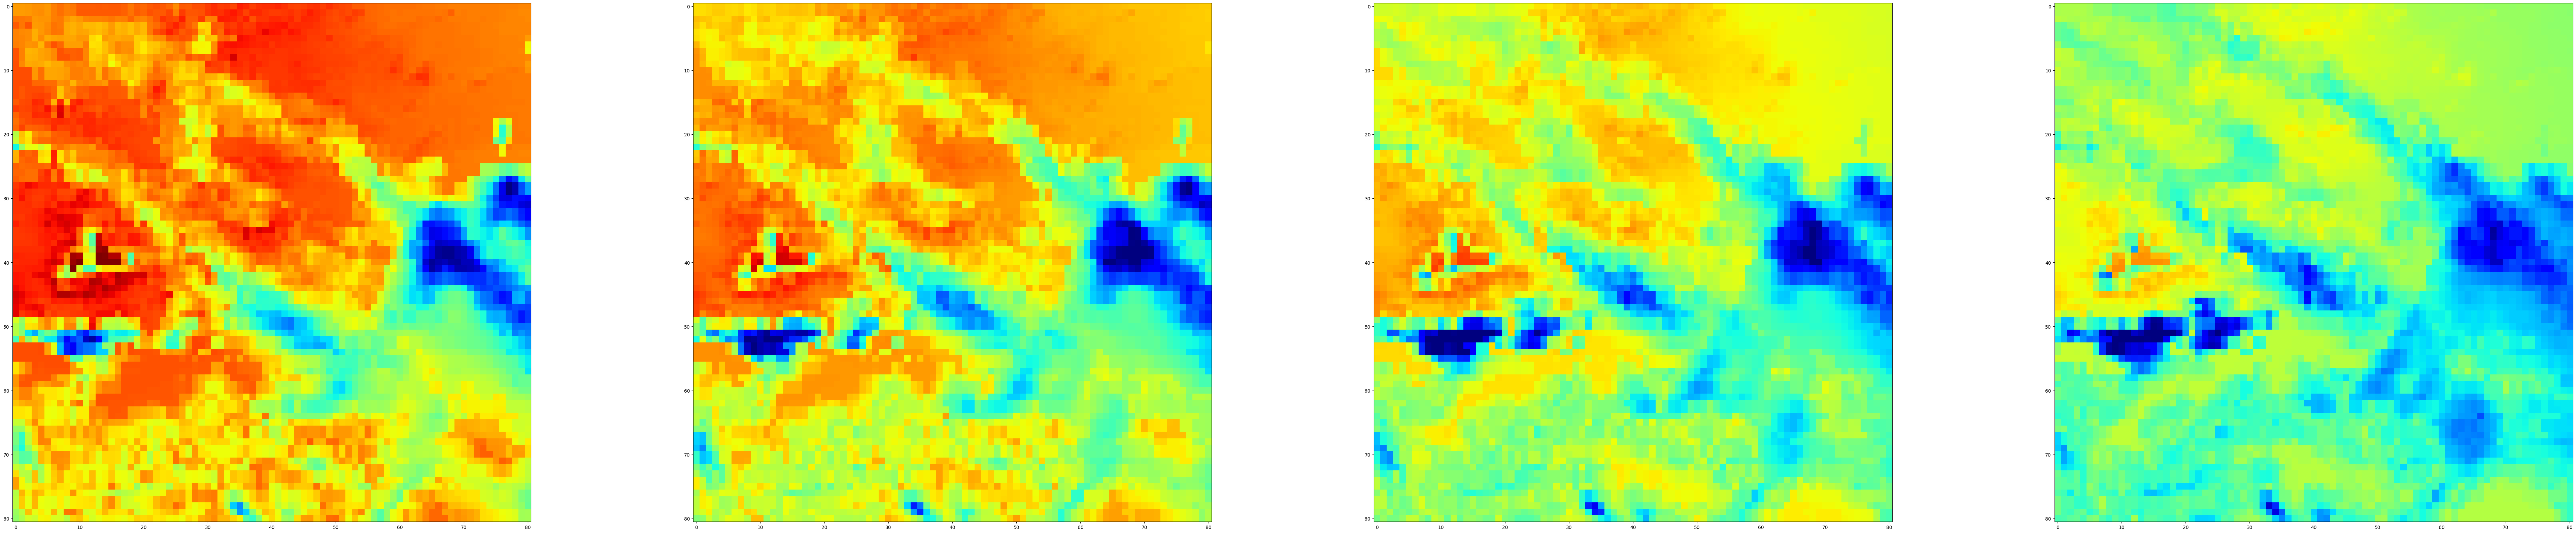

In [121]:
# Looking at element 100 of GHI 
plt.figure (figsize = (100,20))
for i in range (4):
    plt.subplot(1,4,i+1)
    plt.imshow(GHI[99,i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

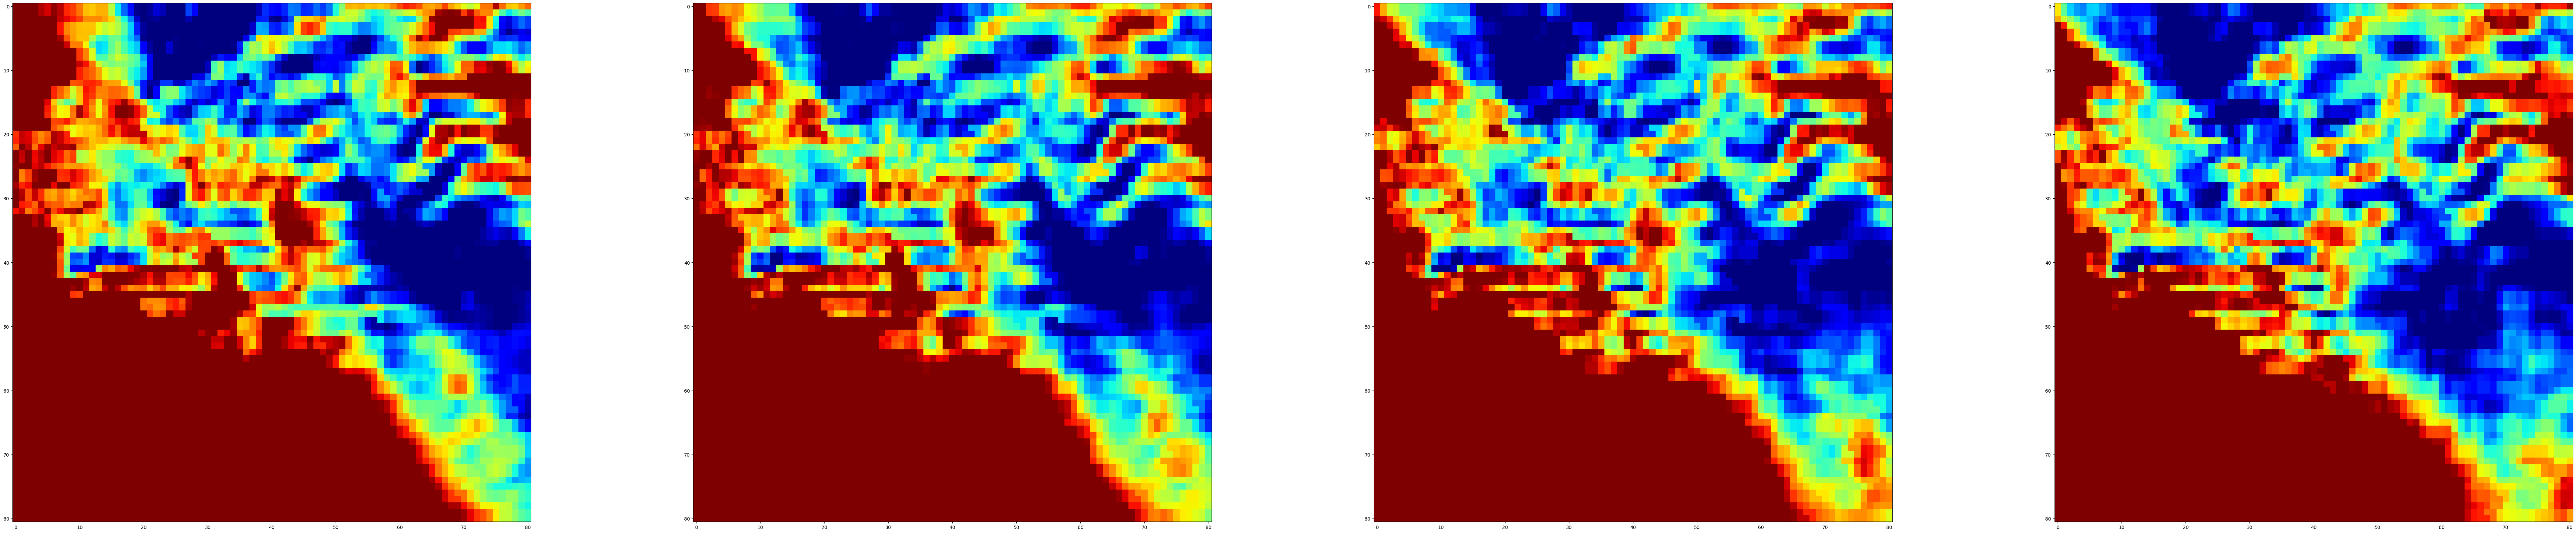

In [122]:
# Looking at element 151 of GHI
plt.figure (figsize = (100,20))
for i in range (4):
    plt.subplot(1,4,i+1)
    plt.imshow(GHI[150,i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

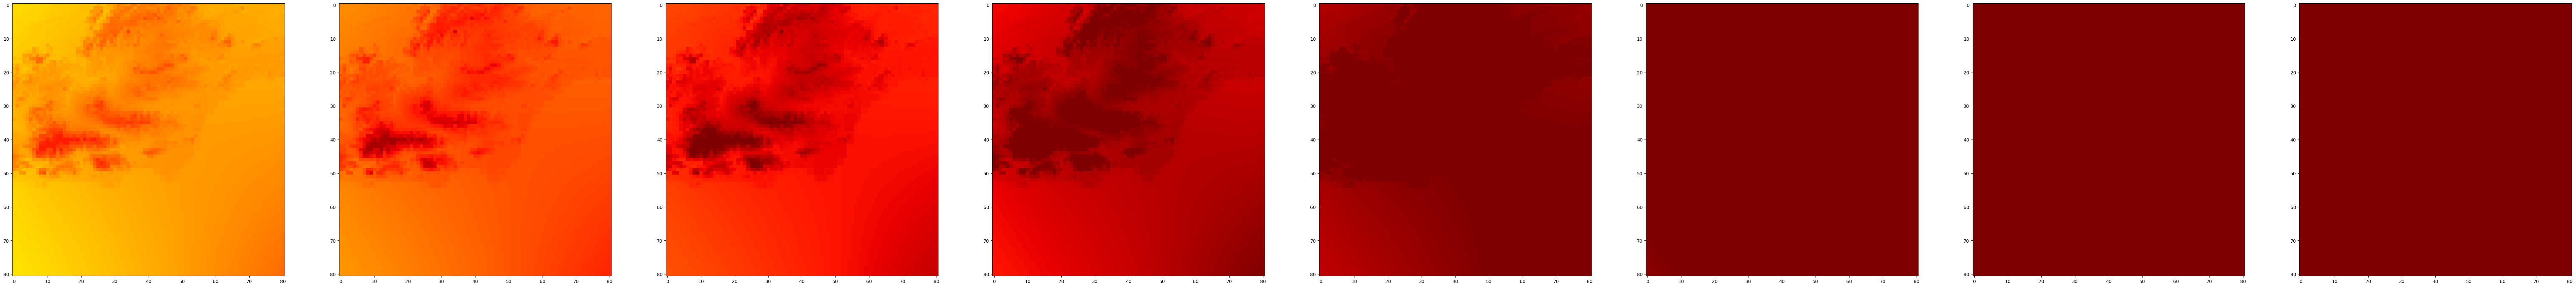

In [123]:
# Looking at GHI without clouds (CLS)
plt.figure (figsize = (100,20))
for i in range (8):
    plt.subplot(1,8,i+1)
    plt.imshow(CLS[97,i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

In [124]:
# Calculating the total radiation in the region for 25th of Jan at 3 pm
total = 0
for i in range(81):
    for j in range (81):
        total += CLS[99, 0, i, j]
        
print(f' The total radiation on {datetime[99]} was {total} W/m2.')

 The total radiation on 2012-01-25 15:00:00 was 3207644.670000001 W/m2.


In [125]:
watt = total * 240 * 240 * 1000 * 1000
watt

1.8476033299200006e+17

In [136]:
# Checking that radiation complies with colour observations at specific date times

print(f'The radiation on {datetime[99]} was {CLS[99, 0, 0, 0]}.')
print(f'The radiation on {datetime[99]} was {CLS[99, 0, :, :].sum()}.')
print(CLS[99, 7, 0, 0])
print(CLS[100, 7, 0, 0])

The radiation on 2012-01-25 15:00:00 was 484.16.
The radiation on 2012-01-25 15:00:00 was 3207644.67.
229.8
371.04


In [127]:
print(datetime[100])
print(datetime[99])
print(datetime[98])
print(datetime[97])
print(datetime[96])
print(datetime[95])

2012-01-26 09:00:00
2012-01-25 15:00:00
2012-01-25 13:00:00
2012-01-25 11:00:00
2012-01-25 09:00:00
2012-01-24 15:00:00


In [143]:
# Looking into the 25th of Jan

# CLS[96, 0, :, :] # 8:15
# CLS[96, 1, :, :] # 8:30
# CLS[96, 2, :, :] # 8:45
# CLS[96, 3, :, :] # 9:00 TIMESTAMP
# CLS[96, 4, :, :] # 9:15
# CLS[96, 5, :, :] # 9:30
# CLS[96, 6, :, :] # 9:45
# CLS[96, 7, :, :] # 10:00
# CLS[97, 0, :, :] # 10:15
# CLS[97, 1, :, :] # 10:30
# CLS[97, 2, :, :] # 10:45
# CLS[97, 3, :, :] # 11:00 TIMESTAMP


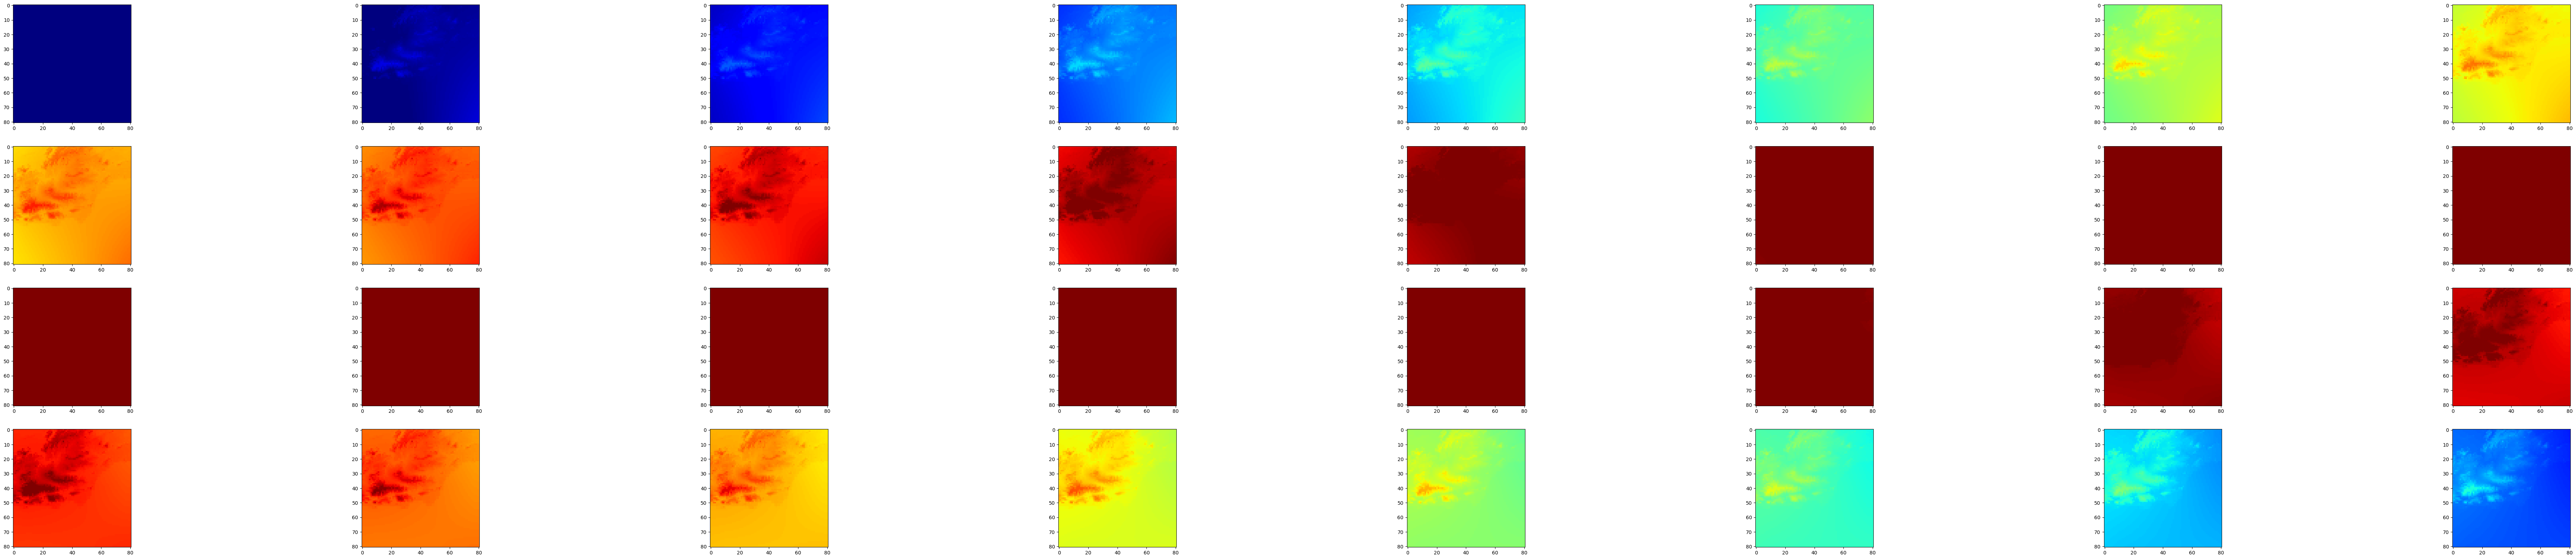

In [129]:
# Plotting a full day

plt.figure (figsize = (100,20))

for j in range(4):
    for i in range(8):
        plt.subplot(4, 8, j * 8 + i + 1)
        plt.imshow(CLS[96+j,i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

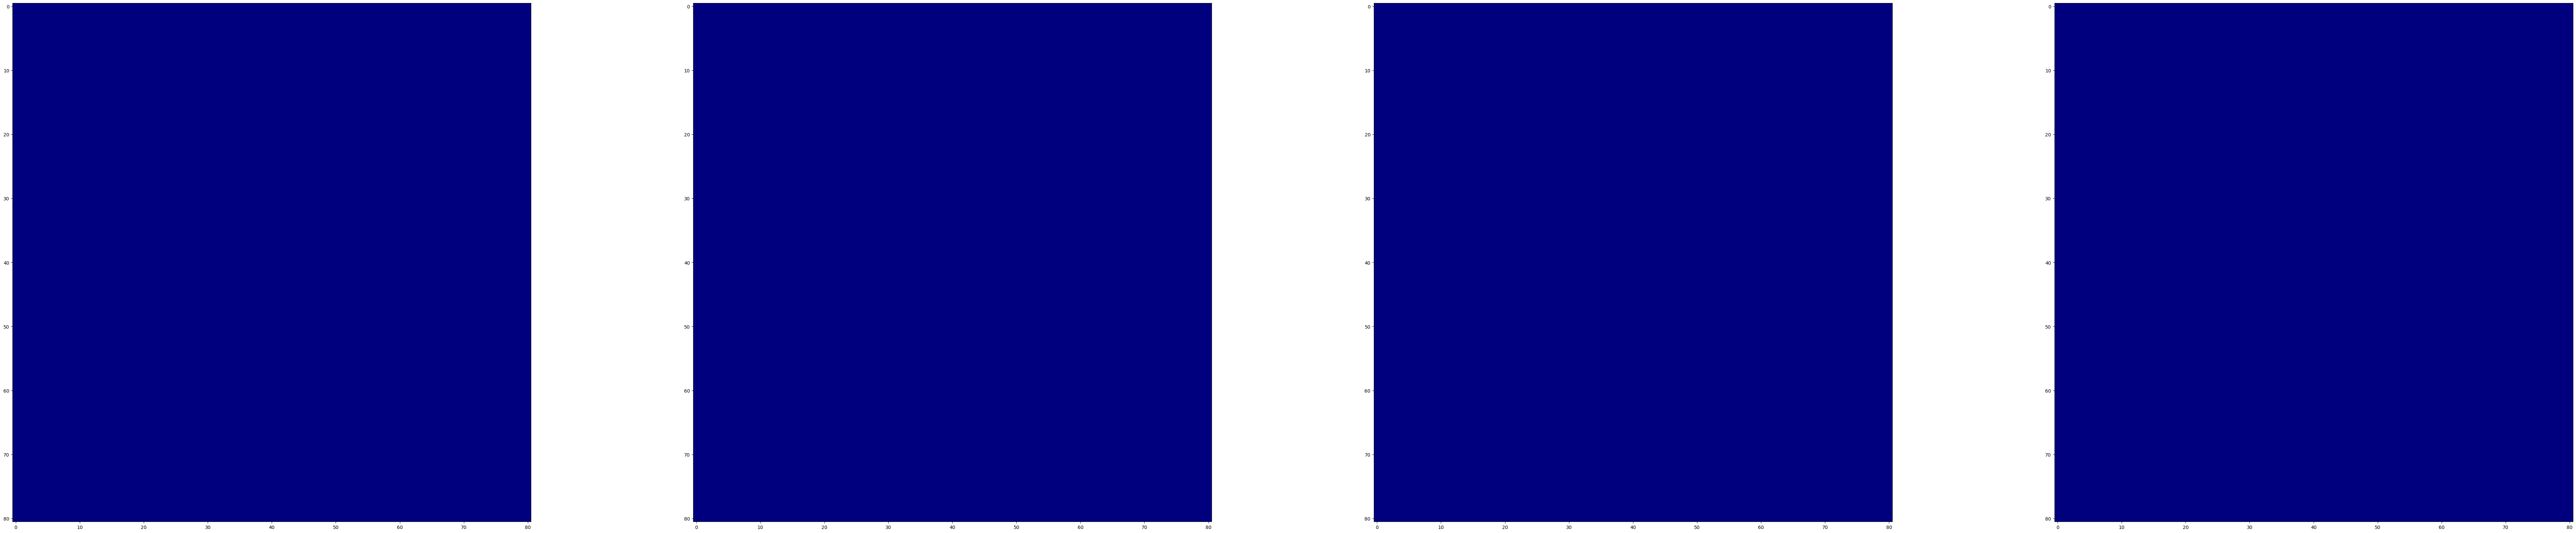

In [130]:
# Looking at SAA which is the solar azimuth angle 
plt.figure (figsize = (100,20))
for i in range (4):
    plt.subplot(1,4,i+1)
    plt.imshow(SAA[99,i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

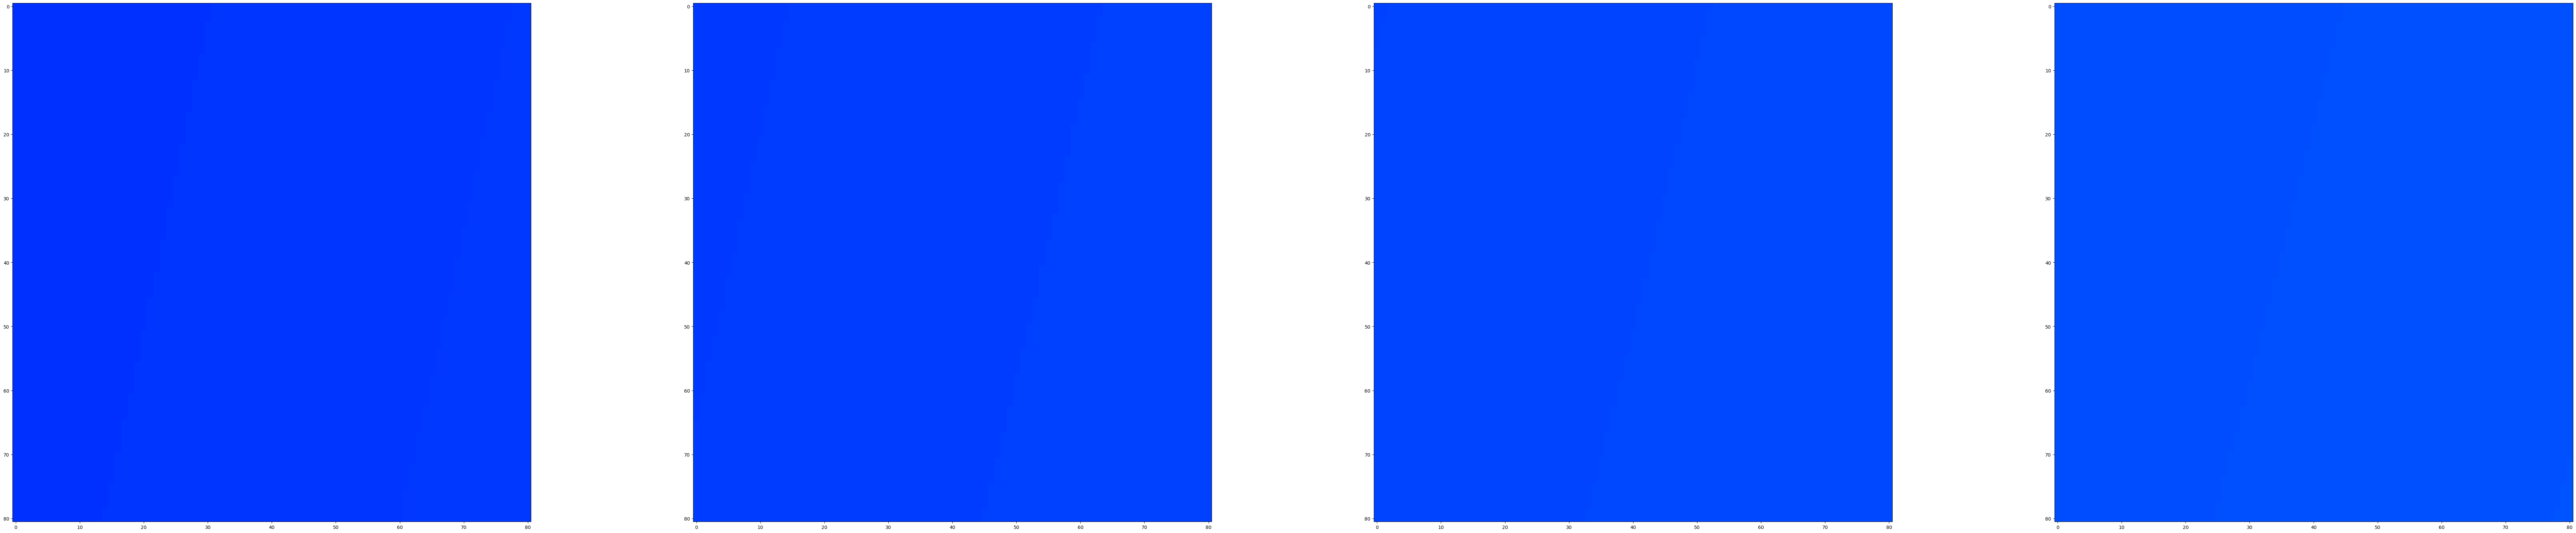

In [131]:
plt.figure (figsize = (100,20))
for i in range (4):
    plt.subplot(1,4,i+1)
    plt.imshow(SZA[99,i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)

In [139]:
# feature = datetime, GHI, CLS, SAA, SZA
# timestamp = 0, 1, 2, 3, (4, 5, 6, 7)
# print(f'The radiation on {datetime[99]} was {CLS[99, 0, :, :].sum()}.')

# The radiation of date

def day_information(
    feature = CLS,
    observation = 96, 
    timestamp = 0):
    
    # Print total radiation for all pixels in a timestamp
    print(f'The radiation on {datetime[observation]} was {feature[observation, timestamp, :, :].sum()}.')
    print(f'The radiation on {datetime[observation]} looks like:')
    plt.figure (figsize = (100,20))
    for j in range(4):
        for i in range(8):
            plt.subplot(4, 8, j * 8 + i + 1)
            plt.imshow(feature[observation+j,i,:,:], cmap='jet', norm='linear', vmin=vmin, vmax=vmax)


The radiation on 2012-01-25 09:00:00 was 660980.51.
The radiation on 2012-01-25 09:00:00 looks like:


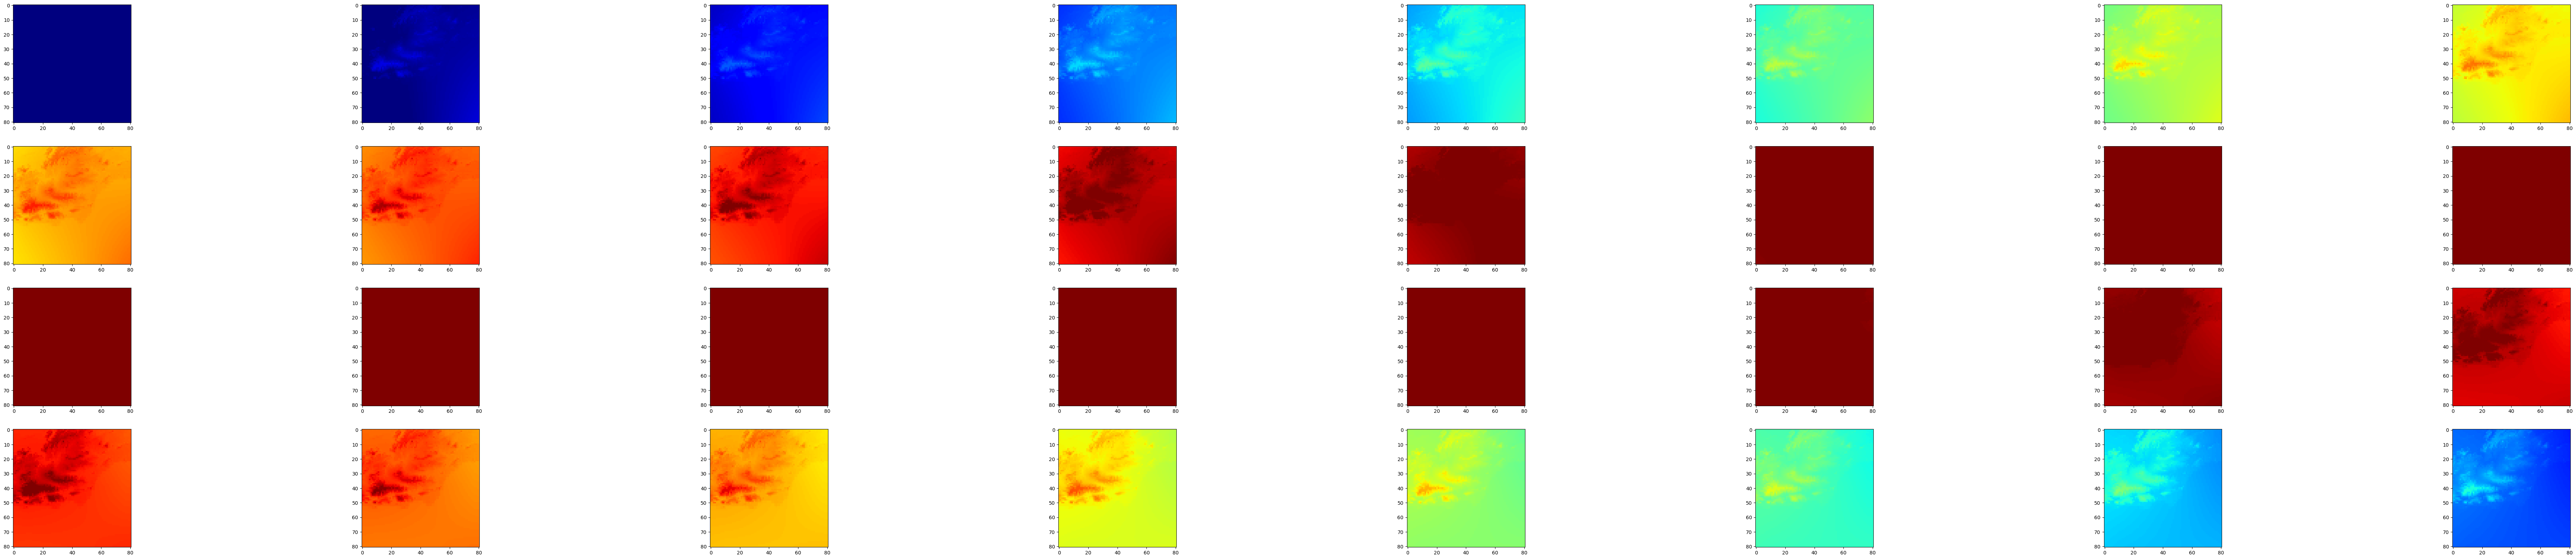

In [140]:
day_information()